# 与3的区别在于从数据库读取数据
由于信息过于巨大，直接读取，会超过jupyter的速率限制，采用将其写入txt文件后再进行读取处理

In [13]:
import jieba

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator
import pymysql

In [3]:
#连接数据库，读取news2.content
conn = pymysql.connect(host="127.0.0.1", user="root", passwd="123456", db="cucnews", port=3306,charset="utf8")


result = []
sqlcmd="SELECT content FROM cucnews.news2"
cur = conn.cursor()
cur.execute(sqlcmd)
dbcontent = cur.fetchall()
f = open("dbcontent.txt","w",encoding="utf-8")
f.write(str(dbcontent))

f.close()
conn.close()


In [4]:
# encoding=utf-8#

with open('dbcontent.txt','r',encoding='utf-8') as f:
    c=f.read()
# jieba.load_userdict(r'C:\Users\12436\Desktop\课件\2021春\舆情\3\stopword.txt')
seg_list=jieba.cut(c,cut_all=False)
# print(list(seg_list))

tf={}
for seg in seg_list:
    if seg in tf:
        tf[seg]+=1
    else:
        tf[seg]=1
print(len(tf))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\12436\AppData\Local\Temp\jieba.cache
Loading model cost 0.737 seconds.
Prefix dict has been built successfully.


61158


# 这里根据第一次词频统计的结果，人为地在stopword中插入了一些高频词语（与主题关系不大，如：中国，传媒大学，学院等），用于删除部分影响较大地词

In [9]:
ci=list(tf.keys())
# print(ci)
with open(r'C:\Users\12436\Desktop\课件\2021春\舆情\3\stopword2.txt','r',encoding='utf-8') as ft:
    stopword=ft.read()
for seg in ci:
    if tf[seg]<15 or len(seg)<2 or seg in stopword or '一' in seg:
        tf.pop(seg)
print(len(tf))

6940


In [10]:
ci=list(tf.keys())
num=list(tf.values())
data=[]
for i in range(len(tf)):
    data.append((num[i],ci[i]))
data.sort()
data.reverse()
print(data)

[(8578, '发展'), (6578, '教育'), (5672, '学生'), (5552, '文化'), (5424, '建设'), (4994, '媒体'), (4878, '新闻'), (4573, '合作'), (4433, '研究'), (4360, '传播'), (4298, '艺术'), (4292, '国际'), (3913, '中心'), (3902, '活动'), (3796, '国家'), (3674, '专业'), (3524, '副校长'), (3471, '创新'), (3334, '学习'), (3306, '同学'), (3248, '高校'), (3172, '交流'), (3117, '代表'), (2961, '院长'), (2951, '教学'), (2905, '学部'), (2804, '主任'), (2556, '实践'), (2520, '项目'), (2500, '相关'), (2490, '会议'), (2442, '参加'), (2406, '时代'), (2379, '管理'), (2326, '校长'), (2292, '精神'), (2289, '社会'), (2227, '领导'), (2182, '教师'), (2167, '服务'), (2134, '老师'), (2130, '主持'), (2123, '全国'), (2115, '情况'), (2111, '部长'), (2075, '师生'), (2027, '介绍'), (1986, '本次'), (1949, '论坛'), (1940, '希望'), (1923, '领域'), (1910, '平台'), (1877, '指出'), (1870, '单位'), (1860, '研究生'), (1854, '动画'), (1837, '培养'), (1797, '改革'), (1781, '作品'), (1741, '组织'), (1736, '现场'), (1692, '教育部'), (1686, '陈文申'), (1671, '提供'), (1665, '思想'), (1660, '未来'), (1657, '内容'), (1636, '研究院'), (1628, '培训'), (1589, '优秀'), (1587, '推动'), 

In [11]:
f=open("result2.txt",'w',encoding='utf-8')
for i in range(len(data)):
    f.write(data[i][1]+","+str(data[i][0])+"\r\n")
f.close()

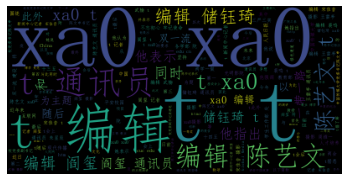

In [14]:

text=open('dbcontent.txt','r',encoding='utf-8').read()
font=r'c:\Windows\Fonts\simfang.ttf'
wc=WordCloud(font_path=font).generate(text)#generate()功能为生成文本
plt.imshow(wc)
plt.axis('off')
plt.show()
# print(dir(WordCloud))

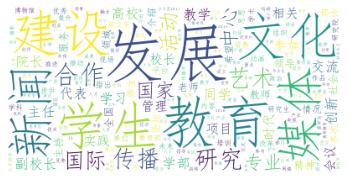

In [15]:
wcdata={}
for d in data:
    wcdata[d[1]]=d[0]
# print(wcdata)
wc2=WordCloud(font_path=font,background_color='white').generate_from_frequencies(wcdata)
plt.imshow(wc2)
plt.axis('off')
plt.show()
wc2.to_file('4.png')

In [16]:
import os
print(os.getcwd())

C:\Users\12436\yuqing


In [17]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud,ImageColorGenerator

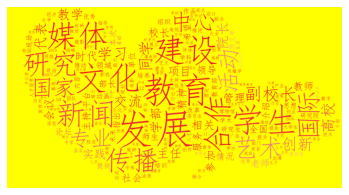

In [19]:
mask=np.array(Image.open('heart.png'))
image_colors=ImageColorGenerator(mask)
wc4=WordCloud(font_path=font,background_color='yellow',mask=mask).generate_from_frequencies(wcdata)


#plt.imshow(wc)
plt.imshow(wc4.recolor(color_func=image_colors))
plt.axis('off')
plt.show()
wc4.to_file('5.jpg')